# Monitoring de la VFC

1.	Évolution de la FC (fréquence cardiaque) :
- Comparez la moyenne de la fréquence cardiaque pour chaque jour/semaine.
- Représentez cela dans un graphique (évolution journalière ou hebdomadaire).

2.	Analyses temporelles et spectrales :
- Temporelles : Moyenne RR, SDNN (écart-type des intervalles RR), RMSSD.
- Spectrales : Low Frequency (LF), High Frequency (HF), ratio LF/HF, Welch, FFT


In [1]:
import pandas as pd

# Importer les données
file_path = '/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/projet PY/Github py /VFC-Analysis/data/Py_Data_HRV - Data.csv'
hrv_data = pd.read_csv(file_path)

# Afficher la strucutres 
hrv_data.head()


,Date,28/10/2024,29/10/2024,30/10/2024,31/10/2024,01/11/2024,02/11/2024,03/11/2024,04/11/2024,5/11/2024,...,15/11/2024,16/11/2024,17/11/2024,18/11/2024,19/11/2024,20/11/2024,21/11/2024,22/11/2024,23/11/2024,24/11/2024
0,Mean RR* (ms),978.0,900.00,921.00,942.00,945.00,812.00,875.00,987.00,964.00,...,962.00,890.00,1034.00,1144.00,956.00,1114.0,990.00,1091.00,1106.00,997.00
1,Mean HR* (bpm),61.0,67.00,65.00,64.00,64.00,74.00,69.00,61.00,62.00,...,62.00,67.00,58.00,52.00,63.00,54.0,61.00,55.00,54.00,60.00
2,SDNN (ms),182.5,167.10,192.60,212.20,214.60,148.70,184.50,228.10,692.60,...,283.00,178.20,233.00,251.10,158.50,137.8,198.90,153.80,163.80,166.60
3,RMSSD (ms),226.8,187.10,220.70,240.00,244.30,170.80,215.00,278.80,996.00,...,382.30,230.80,325.90,383.60,222.00,189.3,254.60,201.00,237.10,216.90
4,pNN50 (%),64.0,61.76,65.24,66.04,66.25,39.25,57.06,73.03,87.82,...,71.79,64.29,69.44,71.54,67.74,64.0,70.67,60.29,82.84,79.19


In [4]:
hrv_data.columns

Index(['Mean RR* (ms)', 'Mean HR* (bpm)', 'SDNN (ms)', 'RMSSD (ms)',
       'pNN50 (%)', 'Stress index'],
      dtype='object', name='Metric')

In [7]:
import matplotlib.pyplot as plt

# Clean column names to remove any leading or trailing spaces
hrv_data.columns = hrv_data.columns.str.strip()

# Verify if the column 'Date' exists and rename it to 'Metric'
if 'Date' in hrv_data.columns:
    hrv_data = hrv_data.rename(columns={"Date": "Metric"}).set_index("Metric").T
else:
    # Handle cases where 'Date' might not be the column name
    print("La colonne 'Date' n'est pas trouvée. Assurez-vous que le fichier contient une colonne pour les métriques.")

# Convert the index to datetime (only if the index contains date strings)
try:
    hrv_data.index = pd.to_datetime(hrv_data.index, format='%d/%m/%Y', errors='coerce')
except Exception as e:
    print("Erreur lors de la conversion des dates :", e)

# Convert all data to numeric for plotting
hrv_data = hrv_data.apply(pd.to_numeric, errors='coerce')

# Vérifier la structure finale des données
print(hrv_data.head())


La colonne 'Date' n'est pas trouvée. Assurez-vous que le fichier contient une colonne pour les métriques.
Metric      Mean RR* (ms)  Mean HR* (bpm)  SDNN (ms)  RMSSD (ms)  pNN50 (%)  \
2024-10-28          978.0            61.0      182.5       226.8      64.00   
2024-10-29          900.0            67.0      167.1       187.1      61.76   
2024-10-30          921.0            65.0      192.6       220.7      65.24   
2024-10-31          942.0            64.0      212.2       240.0      66.04   
2024-11-01          945.0            64.0      214.6       244.3      66.25   

Metric      Stress index  
2024-10-28           2.6  
2024-10-29           4.2  
2024-10-30           3.6  
2024-10-31           2.9  
2024-11-01           2.8  


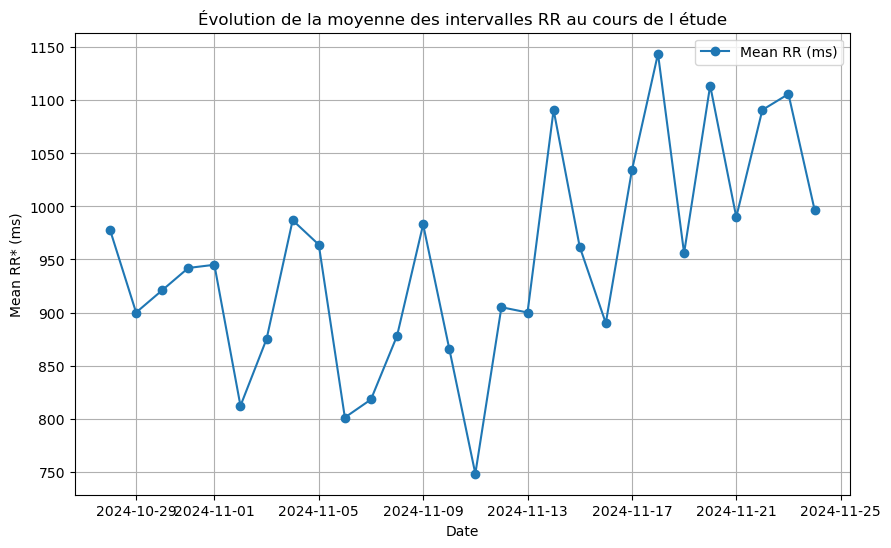

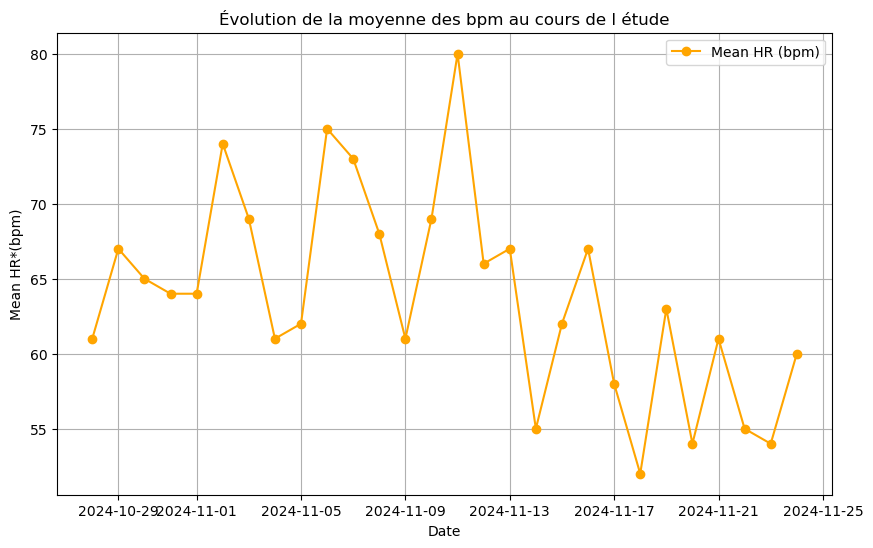

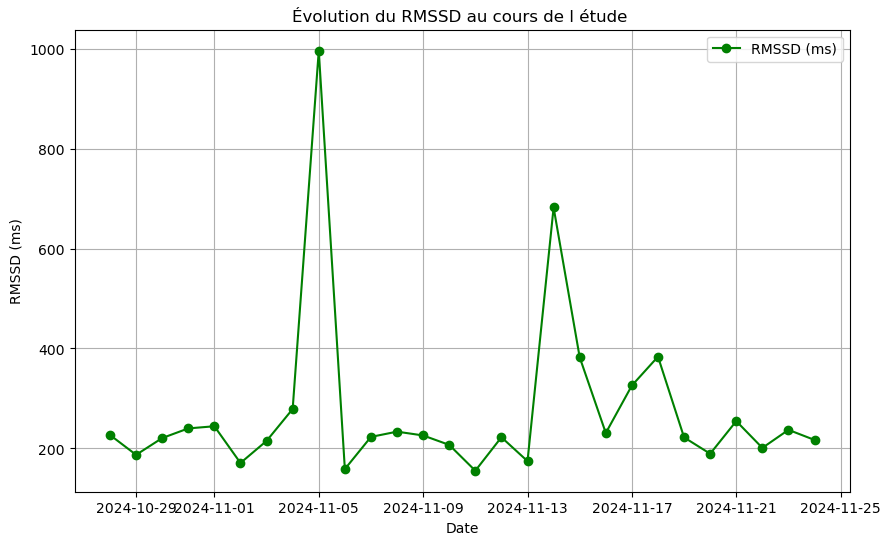

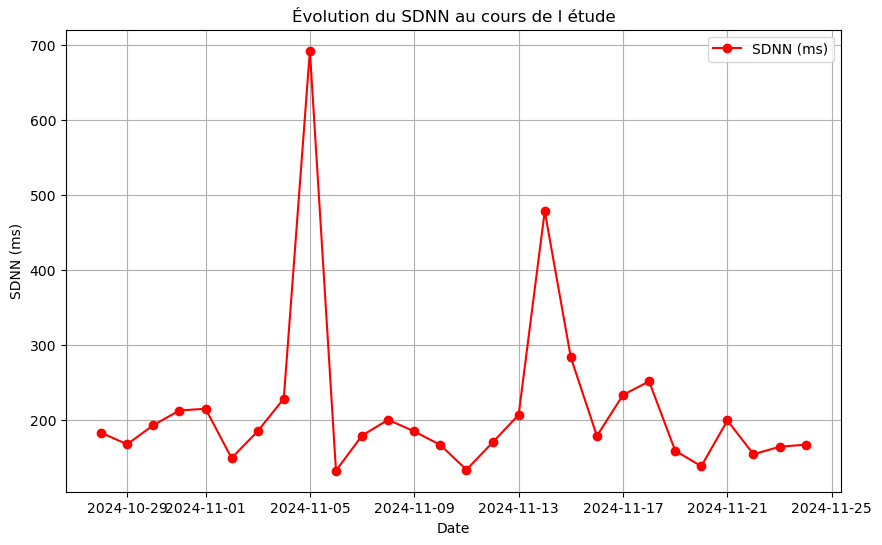

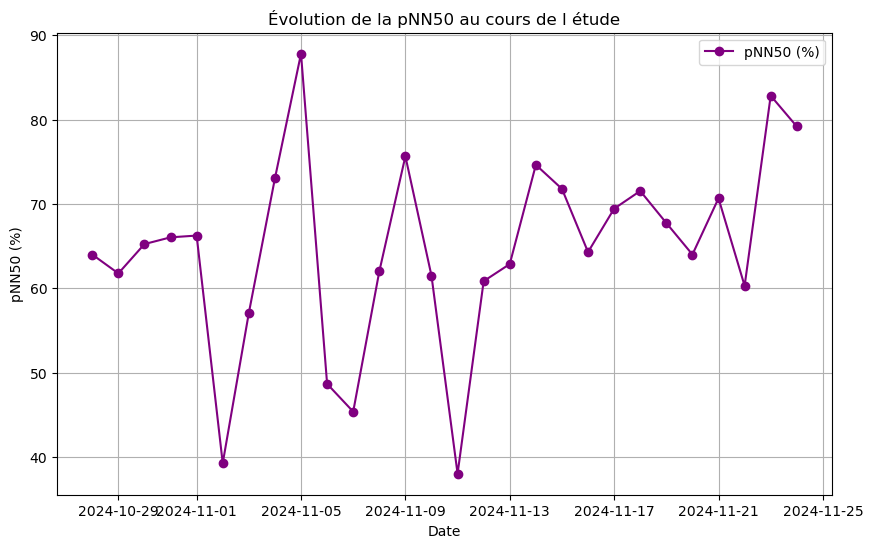

In [9]:


# Extract metrics
mean_rr = hrv_data['Mean RR* (ms)']
mean_hr = hrv_data['Mean HR* (bpm)']
rmssd = hrv_data['RMSSD (ms)']
sdnn = hrv_data['SDNN (ms)']
pnn50 = hrv_data['pNN50 (%)']

# Plot the metrics over time
plt.figure(figsize=(10, 6))
plt.plot(mean_rr, label='Mean RR (ms)', marker='o')
plt.title('Évolution de la moyenne des intervalles RR au cours de l étude')
plt.xlabel('Date')
plt.ylabel('Mean RR* (ms)')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mean_hr, label='Mean HR (bpm)', marker='o', color='orange')
plt.title('Évolution de la moyenne des bpm au cours de l étude')
plt.xlabel('Date')
plt.ylabel('Mean HR*(bpm)')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(rmssd, label='RMSSD (ms)', marker='o', color='green')
plt.title('Évolution du RMSSD au cours de l étude ')
plt.xlabel('Date')
plt.ylabel('RMSSD (ms)')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sdnn, label='SDNN (ms)', marker='o', color='red')
plt.title('Évolution du SDNN au cours de l étude')
plt.xlabel('Date')
plt.ylabel('SDNN (ms)')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(pnn50, label='pNN50 (%)', marker='o', color='purple')
plt.title('Évolution de la pNN50 au cours de l étude')
plt.xlabel('Date')
plt.ylabel('pNN50 (%)')
plt.grid()
plt.legend()
plt.show()
